In [1]:
import pandas as pd 
from ms2rescore import plotting
from ms2rescore.percolator import PercolatorIn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import re
import pickle
from collections import defaultdict
import upsetplot
from matplotlib.patches import Patch

In [2]:
sns.set_context("notebook")

In [3]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [4]:
sns.set_style(style="whitegrid")

# no IAA

In [5]:
path_noIAA = "data/PXD021398/output_noIAA/"
plotting.RescoreRecord.empty_rerecs()
pin = plotting.PIN(path_noIAA+"msms_noIAA_searchengine_ms2pip_rt_features.pin", sample_name="noIAA", score_metric="RawScore")
searchengine = plotting.POUT(path_noIAA+"msms_noIAA_searchengine_features.pout",path_noIAA+"msms_noIAA_searchengine_features.pout_dec", rescoring_features="Search engine", sample_name="noIAA")
ms2rescore = plotting.POUT(path_noIAA+"msms_noIAA_searchengine_ms2pip_rt_features.pout",path_noIAA+"msms_noIAA_searchengine_ms2pip_rt_features.pout_dec", rescoring_features="MS²Rescore", sample_name="noIAA")
prosit = plotting.POUT(path_noIAA+"prosit_target_noIAA.psms", path_noIAA+"prosit_decoy_noIAA.psms", rescoring_features="Prosit", sample_name="noIAA")
prosit.df["peptide"] = prosit.df["peptide"].str.extract(r"_.([A-Z]*)._")
ms2rescore_reduced = plotting.POUT(path_noIAA+"msms_noIAA_searchengine_ms2pip_rt_features_reduced.pout",path_noIAA+"msms_noIAA_searchengine_ms2pip_rt_features_reduced.pout_dec", rescoring_features="MS²Rescore reduced", sample_name="noIAA")


In [6]:
id_list_noIAA = list(ms2rescore.df["PSMId"][(ms2rescore.df["q"] < 0.01)])
len(id_list_noIAA)

483769

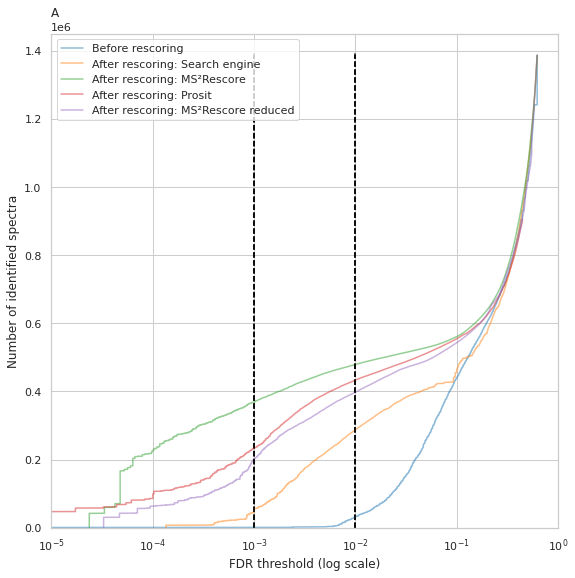

<Figure size 864x720 with 0 Axes>

In [7]:
FDR_figure = plt.figure(figsize=(20,20))
ax1 = FDR_figure.add_subplot(221)
plotting.RescoreRecord.qvalue_comparison(ax=ax1)
ax1.set_ylim(0,1450000)
ax1.vlines([0.01, 0.001],ymin=0,ymax=1400000, colors="black", linestyles="dashed")
ax1.set_title("A", loc="left", pad=17 )
ax1.legend(loc="upper left")

In [8]:
plotting.RescoreRecord._count_identifications([0.001, 0.01])
plotting.RescoreRecord._separate_unique_peptides(FDR_threshold=[0.001, 0.01])
plotting.RescoreRecord.calculate_loss_gain_df(FDR_threshold=[0.001,0.01], reference="After rescoring: Search engine")

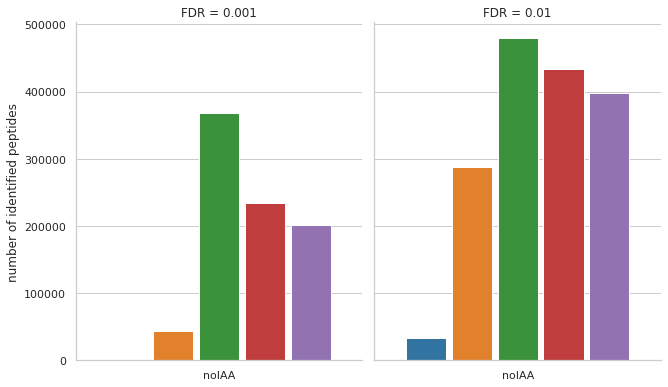

In [9]:
sns.set_style("whitegrid")
g = plotting.RescoreRecord.count_plot()
for ax in g.axes[0]:
    change_width(ax, 0.14)
g.fig.set_size_inches(13, 6)
g._legend.remove()
#plt.legend(title='',bbox_to_anchor=(-0.53,1))
plt.show()

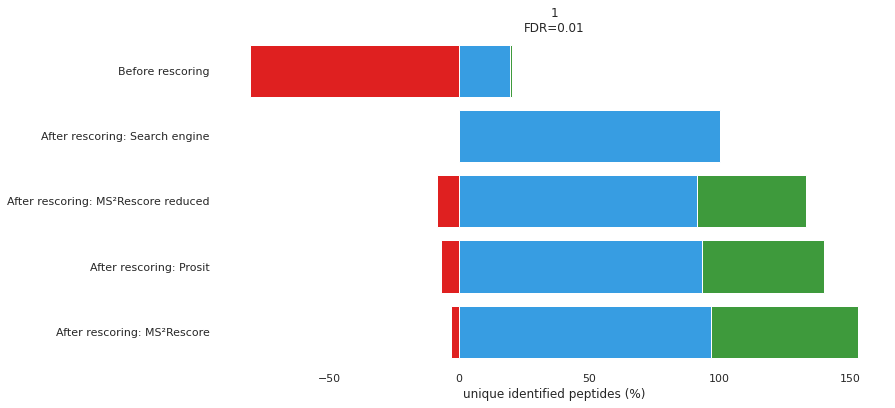

In [10]:
sns.set_style("whitegrid")
plotting.RescoreRecord.loss_gain_plot(FDR=0.01)
plt.show()


In [11]:
original_pin = pin.df
original_ms2rescore = ms2rescore.df
original_searchengine = searchengine.df

In [12]:
# keep prosit ids only
prosit_ids = []
for psmid in prosit.df.PSMId:
    match = re.search(r"(^[\w]*)[-]([0-9]*)", psmid)
    prosit_ids.append(f"{match.group(1)}.{match.group(2)}.{match.group(2)}")

pin.df = pin.df[pin.df["PSMId"].isin(prosit_ids)]
ms2rescore.df = ms2rescore.df[ms2rescore.df["PSMId"].isin(prosit_ids)]
searchengine.df = searchengine.df[searchengine.df["PSMId"].isin(prosit_ids)]
ms2rescore_reduced.df = ms2rescore_reduced.df[ms2rescore_reduced.df["PSMId"].isin(prosit_ids)]

In [13]:
ax2 = FDR_figure.add_subplot(222, sharey=ax1)
plotting.RescoreRecord.qvalue_comparison(ax=ax2)
ax2.set_ylim(0,1450000)
ax2.vlines([0.01, 0.001],ymin=0,ymax=1400000, colors="black", linestyles="dashed")
ax2.set_title("B", loc="left",pad=17  )
ax2.get_legend().remove()


<Figure size 864x720 with 0 Axes>

In [14]:
pin.df = original_pin
ms2rescore.df = original_ms2rescore
searchengine.df = original_searchengine

# IAA

In [15]:
path_IAA = "data/PXD021398/output_IAA/"
plotting.RescoreRecord.empty_rerecs()
pin_A = plotting.PIN(path_IAA+"msms_IAA_searchengine_ms2pip_rt_features.pin", sample_name="IAA", score_metric="RawScore")
searchengine_A = plotting.POUT(path_IAA+"msms_IAA_searchengine_features.pout",path_IAA+"msms_IAA_searchengine_features.pout_dec", rescoring_features="Search engine", sample_name="IAA")
ms2rescore_A = plotting.POUT(path_IAA+"msms_IAA_searchengine_ms2pip_rt_features.pout",path_IAA+"msms_IAA_searchengine_ms2pip_rt_features.pout_dec", rescoring_features="MS²Rescore", sample_name="IAA")
prosit_A = plotting.POUT(path_IAA+"prosit_target_IAA.psms", path_IAA+"prosit_decoy_IAA.psms", rescoring_features="Prosit", sample_name="IAA")
prosit_A.df["peptide"] = prosit_A.df["peptide"].str.extract(r"_.([A-Z]*)._")
ms2rescore_reduced_A = plotting.POUT(path_IAA+"msms_IAA_searchengine_ms2pip_rt_features_reduced.pout",path_IAA+"msms_IAA_searchengine_ms2pip_rt_features_reduced.pout_dec", rescoring_features="MS²Rescore reduced", sample_name="IAA")


In [16]:
id_list_IAA = list(ms2rescore_A.df["PSMId"][(ms2rescore_A.df["q"] < 0.01)])
len(id_list_IAA)

1575308

In [17]:
ax3 = FDR_figure.add_subplot(223, sharex=ax1)
plotting.RescoreRecord.qvalue_comparison(ax=ax3)
ax3.set_ylim(0,4500000)
ax3.vlines([0.01, 0.001],ymin=0,ymax=4500000, colors="black", linestyles="dashed")
ax3.set_title("C", loc="left",pad=17)
ax3.get_legend().remove()

<Figure size 864x720 with 0 Axes>

In [18]:
plotting.RescoreRecord._count_identifications([0.001, 0.01])
plotting.RescoreRecord._separate_unique_peptides(FDR_threshold=[0.001, 0.01])
plotting.RescoreRecord.calculate_loss_gain_df(FDR_threshold=[0.001,0.01], reference="After rescoring: Search engine")

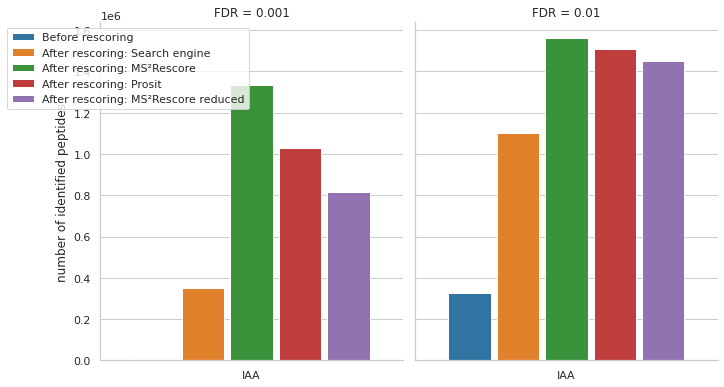

In [19]:
sns.set_style("whitegrid")
g = plotting.RescoreRecord.count_plot()
for ax in g.axes[0]:
    change_width(ax, 0.14)
g.fig.set_size_inches(13, 6)
g._legend.remove()
plt.legend(title='',bbox_to_anchor=(-0.53,1))

In [20]:
original_pin = pin_A.df
original_ms2rescore = ms2rescore_A.df
original_searchengine = searchengine_A.df

In [21]:
prosit_ids = []
for psmid in prosit_A.df.PSMId:
    match = re.search(r"(^[\w]*)[-]([0-9]*)", psmid)
    prosit_ids.append(f"{match.group(1)}.{match.group(2)}.{match.group(2)}")

pin_A.df = pin_A.df[pin_A.df["PSMId"].isin(prosit_ids)]
ms2rescore_A.df = ms2rescore_A.df[ms2rescore_A.df["PSMId"].isin(prosit_ids)]
searchengine_A.df = searchengine_A.df[searchengine_A.df["PSMId"].isin(prosit_ids)]
ms2rescore_reduced_A.df = ms2rescore_reduced_A.df[ms2rescore_reduced_A.df["PSMId"].isin(prosit_ids)]

In [22]:
ax4 = FDR_figure.add_subplot(224, sharex=ax2, sharey=ax3)
plotting.RescoreRecord.qvalue_comparison(ax=ax4)
ax4.set_ylim(0,4500000)
ax4.vlines([0.01, 0.001],ymin=0,ymax=4500000, colors="black", linestyles="dashed")
ax4.set_title("D", loc="left",pad=17)
ax4.get_legend().remove()

<Figure size 864x720 with 0 Axes>

In [23]:
FDR_figure.savefig("data/Figures/FigureS6.svg")

In [24]:
pin_A.df = original_pin
ms2rescore_A.df = original_ms2rescore
searchengine_A.df = original_searchengine

# Combination IAA & noIAA

In [25]:
from immuno_ms2rescore_tools import file_utilities

mgf_files = file_utilities.MascotGenericFormat("/home/compomics/conode55_pride/Arthur/immunopeptidomics_PRIDE/PXD021398/mgf")
spectra_count = mgf_files.count_spectra()
spectra_count["spectra"][spectra_count["raw file"] == "total"]


100%|██████████| 419/419 [09:34<00:00,  1.37s/it]


419    18375659
Name: spectra, dtype: int64

In [26]:
plotting.RescoreRecord.rerecs.pop()
plotting.RescoreRecord.show_rerec_items()

Sample name: IAA
Type: pin
Rescore status: Before rescoring
Sample name: IAA
Type: pout
Rescore status: After rescoring: Search engine
Sample name: IAA
Type: pout
Rescore status: After rescoring: MS²Rescore
Sample name: IAA
Type: pout
Rescore status: After rescoring: Prosit


In [27]:
pin_A.df = pd.concat([pin.df, pin_A.df])
searchengine_A.df = pd.concat([searchengine.df, searchengine_A.df])
ms2rescore_A.df = pd.concat([ms2rescore.df, ms2rescore_A.df])
prosit_A.df = pd.concat([prosit.df, prosit_A.df])


In [28]:
ms2rescore_A.df

,PSMId,score,q,is decoy,peptide
0,M20150626_JGA_HLA_B57_biorep2_5e7ceq_reinject_...,2.75123,0.000024,False,FDGALNVDLTEFQTNLVPYPR
1,M20150626_JGA_HLA_B57_biorep2_5e7ceq_reinject_...,2.45744,0.000024,False,TLVLSNLSYSATEETLQEVFEK
2,GG20161008_CRH_HLAC_1601_biorep2_techrep2.3255...,2.41288,0.000024,False,VVSVLTVLHQDWLNGK
3,M20150626_JGA_HLA_B57_biorep2_5e7ceq_reinject_...,2.35493,0.000024,False,DLYANTVLSGGTTMYPGIADR
4,M20150626_JGA_HLA_B57_biorep2_5e7ceq_reinject_...,2.32255,0.000024,False,TLVLSNLSYSATEETLQEVFEK
...,...,...,...,...,...
2794255,GN20170531_SK_HLA_C0102_R1_02.48671.48671,-7.22463,0.638624,True,HDRDRDRERDREKERERERERAR
2794256,GN20170627_SK_HLA_C0701_R2_02.51048.51048,-7.43346,0.638625,True,RDWTHRYELKCQIRYQNTFTPH
2794257,GG20170301_CRH_HLA_C0403_150mlnIP_rep1_01.1500...,-7.43931,0.638625,True,PFQLPQIQLQLQQRQLYNQFLRRR
2794258,GN20170628_SK_HLA_A3303_R1_01.36658.36658,-7.49386,0.638625,True,RPTWDMRWWQFCRWERLQERLSDCS


In [29]:
plotting.RescoreRecord._count_identifications([0.001, 0.01])
plotting.RescoreRecord._separate_unique_peptides(FDR_threshold=[0.001, 0.01])
plotting.RescoreRecord.calculate_loss_gain_df(FDR_threshold=[0.001,0.01],reference="After rescoring: Search engine")

In [30]:
plotting.RescoreRecord.count_df["count"] = (plotting.RescoreRecord.count_df["count"]/18375659) * 100

In [31]:
plotting.RescoreRecord.count_df

,sample,rescoring,count,FDR
0,IAA,Before rescoring,0.048287,0.001
1,IAA,Before rescoring,1.948621,0.010
2,IAA,After rescoring: Search engine,2.153038,0.001
3,IAA,After rescoring: Search engine,7.570346,0.010
4,IAA,After rescoring: MS²Rescore,9.272886,0.001
5,IAA,After rescoring: MS²Rescore,11.094530,0.010
6,IAA,After rescoring: Prosit,6.869648,0.001
7,IAA,After rescoring: Prosit,10.574043,0.010


In [32]:
plotting.RescoreRecord.unique_df

,sample,rescoring,upeps,FDR,count
0,IAA,Before rescoring,"[FDGALNVDLTEFQTNLVPYPR, HSTIFENLANK, VVSVLTVLH...",0.001,2661
1,IAA,Before rescoring,"[FDGALNVDLTEFQTNLVPYPR, HSTIFENLANK, VVSVLTVLH...",0.010,53769
2,IAA,After rescoring: Search engine,"[FDGALNVDLTEFQTNLVPYPR, HSTIFENLANK, VVSVLTVLH...",0.001,54263
3,IAA,After rescoring: Search engine,"[FDGALNVDLTEFQTNLVPYPR, HSTIFENLANK, VVSVLTVLH...",0.010,141604
4,IAA,After rescoring: MS²Rescore,"[FDGALNVDLTEFQTNLVPYPR, TLVLSNLSYSATEETLQEVFEK...",0.001,161707
5,IAA,After rescoring: MS²Rescore,"[FDGALNVDLTEFQTNLVPYPR, TLVLSNLSYSATEETLQEVFEK...",0.010,192882
6,IAA,After rescoring: Prosit,"[LHHVSSLAWLDEHTLVTTSHDASVK, VIHDNFGIVEGLMTTVHA...",0.001,131029
7,IAA,After rescoring: Prosit,"[LHHVSSLAWLDEHTLVTTSHDASVK, VIHDNFGIVEGLMTTVHA...",0.010,182430


In [33]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

unique_peptides = {}

unique_peptides["MS²Rescore 1% FDR"] = set(plotting.RescoreRecord.unique_df.at[5, 'upeps'])
unique_peptides["Prosit 1% FDR"] = set(plotting.RescoreRecord.unique_df.at[7, 'upeps'])
unique_peptides["MS²Rescore 0.1% FDR"] = set(plotting.RescoreRecord.unique_df.at[4, 'upeps'])
unique_peptides["Prosit 0.1% FDR"] = set(plotting.RescoreRecord.unique_df.at[6, 'upeps'])

fig = plt.Figure(figsize=(14,10))

upeps = upsetplot.from_contents(unique_peptides)
upsetplot.plot(upeps, show_counts='%d', element_size=None,totals_plot_elements=5, fig=fig)
fig.axes[0].remove()
fig.axes[1].remove()
fig.axes[-1].set_ylabel("unique identified peptides")
fig.axes[1].set_title("A", loc="left")
fig.savefig("data/Figures/FigureS5.svg")

In [34]:
plotting.RescoreRecord.loss_gain_df

,sample,feature,FDR,shared,gain,loss
0,IAA,Before rescoring,0.001,4.806222,4.903894,-95.193778
1,IAA,After rescoring: Search engine,0.001,100.000000,100.000000,-0.000000
2,IAA,After rescoring: MS²Rescore,0.001,99.432394,298.006008,-0.567606
3,IAA,After rescoring: Prosit,0.001,94.500857,241.470247,-5.499143
4,IAA,Before rescoring,0.010,36.974238,37.971385,-63.025762
5,IAA,After rescoring: Search engine,0.010,100.000000,100.000000,-0.000000
6,IAA,After rescoring: MS²Rescore,0.010,96.697127,136.212254,-3.302873
7,IAA,After rescoring: Prosit,0.010,94.692240,128.831106,-5.307760


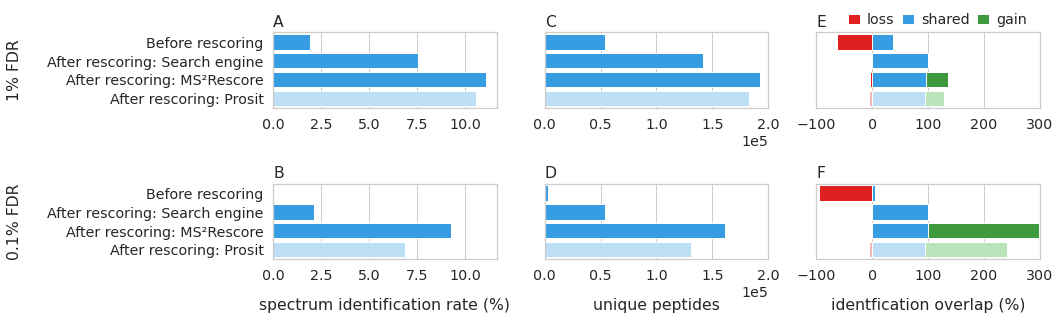

In [35]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)
fig = plt.Figure(figsize=(15,5))

ax1 = plt.subplot2grid((2,3),(0,0), colspan=1, fig=fig)
sns.barplot(
    x="count",
    y="rescoring",
    data=plotting.RescoreRecord.count_df[plotting.RescoreRecord.count_df["FDR"]== 0.01],
    palette=sns.color_palette(["#1AA3FF","#1AA3FF","#1AA3FF","#B3E1FF"]),
    ax=ax1
)
ax1.set_ylabel("1% FDR")
ax1.yaxis.labelpad = 25
ax1.set_xlabel("")
ax1.set_title("A",loc="left")

ax2 = plt.subplot2grid((2,3),(0,1), colspan=1, fig=fig)
sns.barplot(
    x="count",
    y="rescoring",
    data=plotting.RescoreRecord.unique_df[plotting.RescoreRecord.unique_df["FDR"]== 0.01],
    palette=sns.color_palette(["#1AA3FF","#1AA3FF","#1AA3FF","#B3E1FF"]),
    ax=ax2
)
ax2.set_ylabel("")
ax2.set_yticklabels([])
ax2.set_xlabel("")
ax2.ticklabel_format(style='scientific', axis="x", scilimits=(0, 0))

ax2.set_title("C",loc="left")
ax2.set_xlim(0,200000)

ax3 = plt.subplot2grid((2,3),(0,2),colspan=1, fig=fig)
sns.barplot(
    y="feature",
    x="gain",
    data=plotting.RescoreRecord.loss_gain_df[plotting.RescoreRecord.loss_gain_df["FDR"]== 0.01],
    palette=sns.color_palette(["#2FA92D","#2FA92D","#2FA92D","#B3EBB2"]),
    ax=ax3,
    label="gain"
)
sns.barplot(
    y="feature",
    x="shared",
    data=plotting.RescoreRecord.loss_gain_df[plotting.RescoreRecord.loss_gain_df["FDR"]== 0.01],
    palette=sns.color_palette(["#1AA3FF","#1AA3FF","#1AA3FF","#B3E1FF"]),
    ax=ax3,
    label="shared"
)
sns.barplot(
    y="feature",
    x="loss",
    data=plotting.RescoreRecord.loss_gain_df[plotting.RescoreRecord.loss_gain_df["FDR"]== 0.01],
    palette=sns.color_palette(["#FF0000","#FF0000","#FF0000","#FFABAB"]),
    ax=ax3,
    label="loss"
)
ax3.set_xlim(-100,300)
ax3.set_ylabel("")
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(
    [handles[idx] for idx in [2,1,0]],
    [labels[idx] for idx in [2,1,0]],
    frameon=False, 
    ncol=3, 
    bbox_to_anchor=(1.0,1.43),
    handletextpad=0.5, 
    handlelength=0.85, 
    columnspacing=0.5
)
ax3.set_xlabel("")
ax3.set_yticklabels([])
ax3.set_title("E",loc="left")



ax4 = plt.subplot2grid((2,3),(1,0),colspan=1, fig=fig, sharex=ax1)
sns.barplot(
    x="count",
    y="rescoring",
    data=plotting.RescoreRecord.count_df[plotting.RescoreRecord.count_df["FDR"]== 0.001],
    palette=sns.color_palette(["#1AA3FF","#1AA3FF","#1AA3FF","#B3E1FF"]),
    ax=ax4
)
ax4.set_ylabel("0.1% FDR")
ax4.yaxis.labelpad = 25
ax4.set_xlabel("spectrum identification rate (%)")
ax4.xaxis.labelpad = 15
ax4.set_title("B",loc="left")

ax5 = plt.subplot2grid((2,3),(1,1),colspan=1, fig=fig, sharex=ax2)
sns.barplot(
    x="count",
    y="rescoring",
    data=plotting.RescoreRecord.unique_df[plotting.RescoreRecord.unique_df["FDR"]== 0.001],
    palette=sns.color_palette(["#1AA3FF","#1AA3FF","#1AA3FF","#B3E1FF"]),
    ax=ax5
)
ax5.set_ylabel("")
ax5.set_yticklabels([])
ax5.set_xlabel("unique peptides")
ax5.xaxis.labelpad = 15
ax5.set_title("D",loc="left")

ax6 = plt.subplot2grid((2,3),(1,2),colspan=1, fig=fig, sharex=ax3)
sns.barplot(
    y="feature",
    x="gain",
    data=plotting.RescoreRecord.loss_gain_df[plotting.RescoreRecord.loss_gain_df["FDR"]== 0.001],
    palette=sns.color_palette(["#2FA92D","#2FA92D","#2FA92D","#B3EBB2"]),
    ax=ax6,
)
sns.barplot(
    y="feature",
    x="shared",
    data=plotting.RescoreRecord.loss_gain_df[plotting.RescoreRecord.loss_gain_df["FDR"]== 0.001],
    palette=sns.color_palette(["#1AA3FF","#1AA3FF","#1AA3FF","#B3E1FF"]),
    ax=ax6,
)
sns.barplot(
    y="feature",
    x="loss",
    data=plotting.RescoreRecord.loss_gain_df[plotting.RescoreRecord.loss_gain_df["FDR"]== 0.001],
    palette=sns.color_palette(["#FF0000","#FF0000","#FF0000","#FFABAB"]),
    ax=ax6,
)
ax6.set_ylabel("")
ax6.set_xlabel("identfication overlap (%)")
ax6.xaxis.labelpad = 15
ax6.set_yticklabels([])
ax6.set_title("F",loc="left")
fig.tight_layout(rect=[0, 0, 1, 1])
fig.savefig("data/Figures/Figure2.svg")
fig


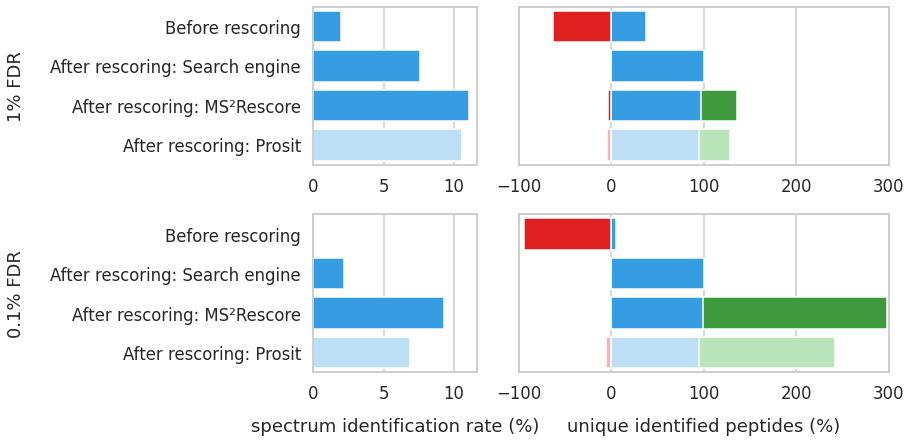

In [36]:
sns.set_context("talk")
fig = plt.Figure(figsize=(13,5))

ax1 = plt.subplot2grid((2,3),(0,0), colspan=1, fig=fig)
sns.barplot(
    x="count",
    y="rescoring",
    data=plotting.RescoreRecord.count_df[plotting.RescoreRecord.count_df["FDR"]== 0.01],
    palette=sns.color_palette(["#1AA3FF","#1AA3FF","#1AA3FF","#B3E1FF"]),
    ax=ax1
)
ax1.set_ylabel("1% FDR")
ax1.yaxis.labelpad = 25
ax1.set_xlabel("")

ax3 = plt.subplot2grid((2,3),(0,1),colspan=2, fig=fig)
sns.barplot(
    y="feature",
    x="gain",
    data=plotting.RescoreRecord.loss_gain_df[plotting.RescoreRecord.loss_gain_df["FDR"]== 0.01],
    palette=sns.color_palette(["#2FA92D","#2FA92D","#2FA92D","#B3EBB2"]),
    ax=ax3,
    label="gain"
)
sns.barplot(
    y="feature",
    x="shared",
    data=plotting.RescoreRecord.loss_gain_df[plotting.RescoreRecord.loss_gain_df["FDR"]== 0.01],
    palette=sns.color_palette(["#1AA3FF","#1AA3FF","#1AA3FF","#B3E1FF"]),
    ax=ax3,
    label="shared"
)
sns.barplot(
    y="feature",
    x="loss",
    data=plotting.RescoreRecord.loss_gain_df[plotting.RescoreRecord.loss_gain_df["FDR"]== 0.01],
    palette=sns.color_palette(["#FF0000","#FF0000","#FF0000","#FFABAB"]),
    ax=ax3,
    label="loss"
)
ax3.set_xlim(-100,300)
ax3.set_ylabel("")
# handles, labels = ax3.get_legend_handles_labels()
# ax3.legend(
#     [handles[idx] for idx in [2,1,0]],
#     [labels[idx] for idx in [2,1,0]],
#     frameon=False, 
#     ncol=3, 
#     bbox_to_anchor=(1.0,1.43),
#     handletextpad=0.5, 
#     handlelength=0.85, 
#     columnspacing=0.5
# )
ax3.set_xlabel("")
ax3.set_yticklabels([])


ax4 = plt.subplot2grid((2,3),(1,0),colspan=1, fig=fig, sharex=ax1)
sns.barplot(
    x="count",
    y="rescoring",
    data=plotting.RescoreRecord.count_df[plotting.RescoreRecord.count_df["FDR"]== 0.001],
    palette=sns.color_palette(["#1AA3FF","#1AA3FF","#1AA3FF","#B3E1FF"]),
    ax=ax4
)
ax4.set_ylabel("0.1% FDR")
ax4.yaxis.labelpad = 25
ax4.set_xlabel("spectrum identification rate (%)")
ax4.xaxis.labelpad = 15


ax6 = plt.subplot2grid((2,3),(1,1),colspan=2, fig=fig, sharex=ax3)
sns.barplot(
    y="feature",
    x="gain",
    data=plotting.RescoreRecord.loss_gain_df[plotting.RescoreRecord.loss_gain_df["FDR"]== 0.001],
    palette=sns.color_palette(["#2FA92D","#2FA92D","#2FA92D","#B3EBB2"]),
    ax=ax6,
)
sns.barplot(
    y="feature",
    x="shared",
    data=plotting.RescoreRecord.loss_gain_df[plotting.RescoreRecord.loss_gain_df["FDR"]== 0.001],
    palette=sns.color_palette(["#1AA3FF","#1AA3FF","#1AA3FF","#B3E1FF"]),
    ax=ax6,
)
sns.barplot(
    y="feature",
    x="loss",
    data=plotting.RescoreRecord.loss_gain_df[plotting.RescoreRecord.loss_gain_df["FDR"]== 0.001],
    palette=sns.color_palette(["#FF0000","#FF0000","#FF0000","#FFABAB"]),
    ax=ax6,
)
ax6.set_ylabel("")
ax6.set_xlabel("unique identified peptides (%)")
ax6.xaxis.labelpad = 15
ax6.set_yticklabels([])

fig.tight_layout(rect=[0, 0.1, 1, 1.4])
fig


In [37]:
# accepted_targets = id_list_IAA + id_list_noIAA
# with open("data/PXD021398/ms2rescore_accepted_targets_1FDR.pkl", "wb") as fp:
#     pickle.dump(accepted_targets, fp)


# HLA analysis

In [38]:
from functools import reduce

In [39]:
with open("data/PXD021398/HLA_allele_rawfile_mapping.pkl", "rb") as fp:
    hla_raw_map = pickle.load(fp)

In [40]:
def map_psmid_hla_type(psmids: pd.Series, hla_mapper: dict):
    if "." in psmids.iloc[0]:
        hla_types = psmids.str.split(".", 1, expand=True)[0].map(hla_mapper)
    elif "-" in psmids.iloc[0]:
        hla_types = psmids.str.split("-", 1, expand=True)[0].map(hla_mapper)
    else:
        raise KeyError
    return hla_types

In [41]:
try:
    spectra_count.set_index("raw file",inplace=True)
except KeyError:
    pass
hla_spectra_count = defaultdict(int)
for rawfile in hla_raw_map.keys():
    try:
        hla_spectra_count[hla_raw_map[rawfile]] += spectra_count.loc[rawfile]["spectra"]
    except KeyError:
        continue

### 1% FDR

In [42]:
pin_A.df.head()

,PSMId,is decoy,score,q,peptide
1005964,M20150626_JGA_HLA_B57_biorep2_5e7ceq_reinject_...,False,339.53,0.0,FDGALNVDLTEFQTNLVPYPR
453077,GG20161008_CRH_HLAC_1601_biorep2_techrep1.1318...,False,320.96,0.0,HSTIFENLANK
490487,GG20161008_CRH_HLAC_1601_biorep2_techrep2.3255...,False,313.87,0.0,VVSVLTVLHQDWLNGK
1006021,M20150626_JGA_HLA_B57_biorep2_5e7ceq_reinject_...,False,285.95,0.0,TLVLSNLSYSATEETLQEVFEK
478148,GG20161008_CRH_HLAC_1601_biorep2_techrep2.1281...,False,284.73,0.0,HSTIFENLANK


In [43]:
rescoring_methods = ["no rescoring", "searchengine", "ms2rescore", "prosit"]
# C12_03_sets = {}
hla_count_dataframes = []
for i, df in enumerate([pin_A.df, searchengine_A.df, ms2rescore_A.df, prosit_A.df]):
    rescoring_df = df.copy()
    rescoring_df["HLA_type"] = map_psmid_hla_type(rescoring_df.PSMId, hla_raw_map)
    # C12_03_sets[rescoring_methods[i]] = set(rescoring_df["peptide"][(rescoring_df["is decoy"] == False) & (rescoring_df["HLA_type"] == "C1203") & (rescoring_df["q"] < 0.01)])
    tmp = rescoring_df[(rescoring_df["q"] < 0.01) & (rescoring_df["is decoy"] == False)].groupby("HLA_type").agg({"peptide":"count"}).reset_index().rename({"peptide": f"psm count {rescoring_methods[i]}"}, axis=1)
    hla_count_dataframes.append(tmp)

hla_count_df = reduce(lambda left,right:pd.merge(left, right, on=["HLA_type"], how="outer"), hla_count_dataframes)

In [44]:
# with open("/home/arthur/ms2rescore-immunopeptidomics-manuscript/notebooks/data/PXD021398/C1203_upeps_ms2rescore_loss.txt", "w") as f:
#     print(len(C12_03_sets["searchengine"] - C12_03_sets["ms2rescore"]))
#     for pep in C12_03_sets["searchengine"] - C12_03_sets["ms2rescore"]:
#         f.write(f"{pep}\n")

In [45]:
hla_count_df.sort_values("psm count ms2rescore", ascending=False, inplace=True)

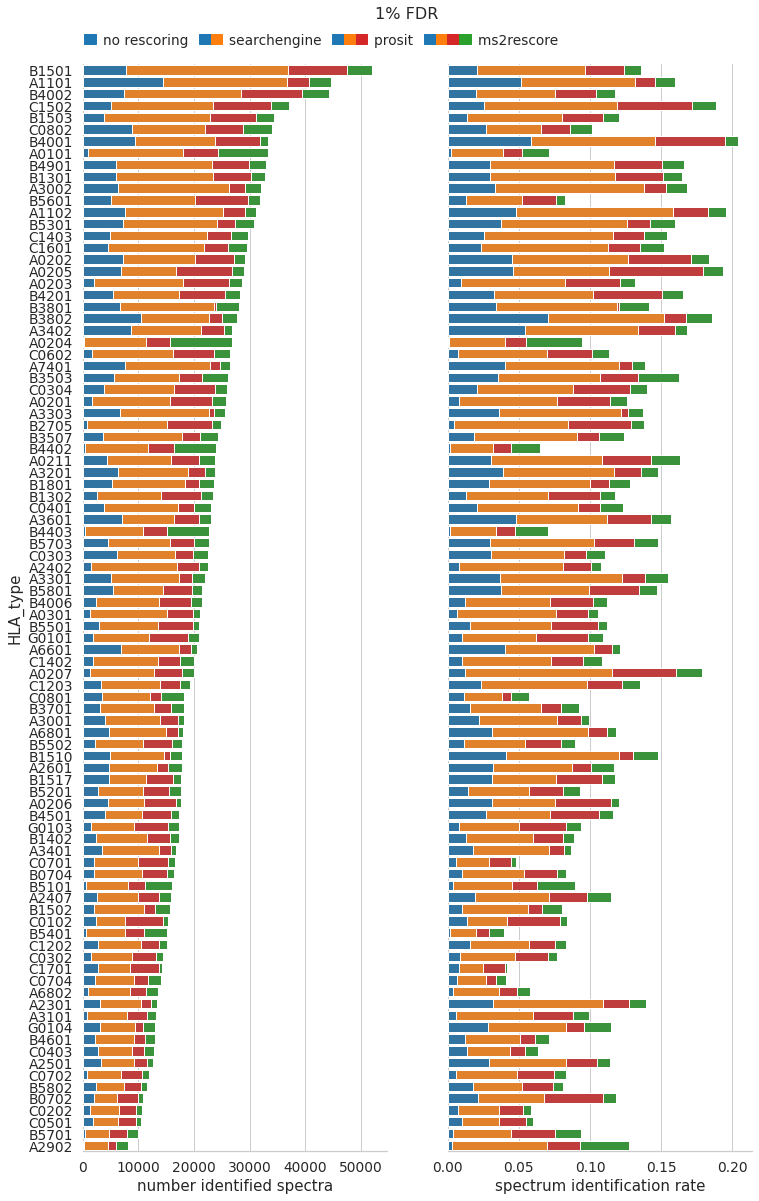

In [46]:
sns.set_context("notebook", font_scale=1.25)

fig = plt.Figure(figsize=(12,20))

ax1 = fig.add_subplot(121)

sns.barplot(x="psm count ms2rescore", y="HLA_type", label="ms2rescore", data=hla_count_df, color="#2ca02c", ax=ax1)
sns.barplot(x="psm count prosit", y="HLA_type", label="prosit", data=hla_count_df, color="#d62728", ax=ax1)
sns.barplot(x="psm count searchengine", y="HLA_type", label="searchengine", data=hla_count_df, color="#ff7f0e", ax=ax1)
sns.barplot(x="psm count no rescoring", y="HLA_type", label="no rescoring", data=hla_count_df, color="#1f77b4", ax=ax1)

ax1.set_xlabel("number identified spectra")

handles, labels = ax1.get_legend_handles_labels()

NOR = Patch(facecolor="#1f77b4", edgecolor="#1f77b4")
SE = Patch(facecolor="#ff7f0e", edgecolor="#ff7f0e")
PR = Patch(facecolor="#d62728", edgecolor="#d62728")
MS = Patch(facecolor="#2ca02c", edgecolor="#2ca02c")

ax1.legend(
    [NOR, NOR, SE,NOR,SE,PR,NOR,SE,PR,MS],
    ["no rescoring    ","","searchengine    ","", "", "prosit    ", "", "", "", "ms2rescore    "],
    frameon=False, 
    ncol=10,
    bbox_to_anchor=(1.66,1.04),
    handletextpad=0.5, 
    handlelength=0.85, 
    columnspacing=-0.5
)
sns.despine(left=True, right=True, top=True, ax=ax1)

ax2 = fig.add_subplot(122)

hla_id_rate = hla_count_df.copy()
hla_id_rate.iloc[:,1:] = hla_id_rate.iloc[:,1:].div(pd.Series(hla_spectra_count).reindex(hla_id_rate["HLA_type"]).values, axis=0)

sns.barplot(x="psm count ms2rescore", y="HLA_type", label="ms2rescore", data=hla_id_rate, color="#2ca02c", ax=ax2)
sns.barplot(x="psm count prosit", y="HLA_type", label="prosit", data=hla_id_rate, color="#d62728", ax=ax2)
sns.barplot(x="psm count searchengine", y="HLA_type", label="searchengine", data=hla_id_rate, color="#ff7f0e", ax=ax2)
sns.barplot(x="psm count no rescoring", y="HLA_type", label="no rescoring", data=hla_id_rate, color="#1f77b4", ax=ax2)

ax2.set_xlabel("spectrum identification rate")
ax2.set_ylabel("")
ax2.set(yticklabels=[])
sns.despine(left=True, right=True, top=True, ax=ax2)
fig.suptitle('1% FDR', fontsize=16, y=0.92)
fig.savefig("data/Figures/FigureS3.svg")
fig

### 0.1% FDR

In [47]:
rescoring_methods = ["no rescoring", "searchengine", "ms2rescore", "prosit"]
hla_count_dataframes = []
for i, df in enumerate([pin_A.df, searchengine_A.df, ms2rescore_A.df, prosit_A.df]):
    rescoring_df = df.copy()
    rescoring_df["HLA_type"] = map_psmid_hla_type(rescoring_df.PSMId, hla_raw_map)
    tmp = rescoring_df[(rescoring_df["q"] < 0.001) & (rescoring_df["is decoy"] == False)].groupby("HLA_type").agg({"peptide":"count"}).reset_index().rename({"peptide": f"psm count {rescoring_methods[i]}"}, axis=1)
    hla_count_dataframes.append(tmp)

hla_count_df = reduce(lambda left,right:pd.merge(left, right, on=["HLA_type"], how="outer"), hla_count_dataframes)

In [48]:
hla_count_df.sort_values("psm count ms2rescore", ascending=False, inplace=True)

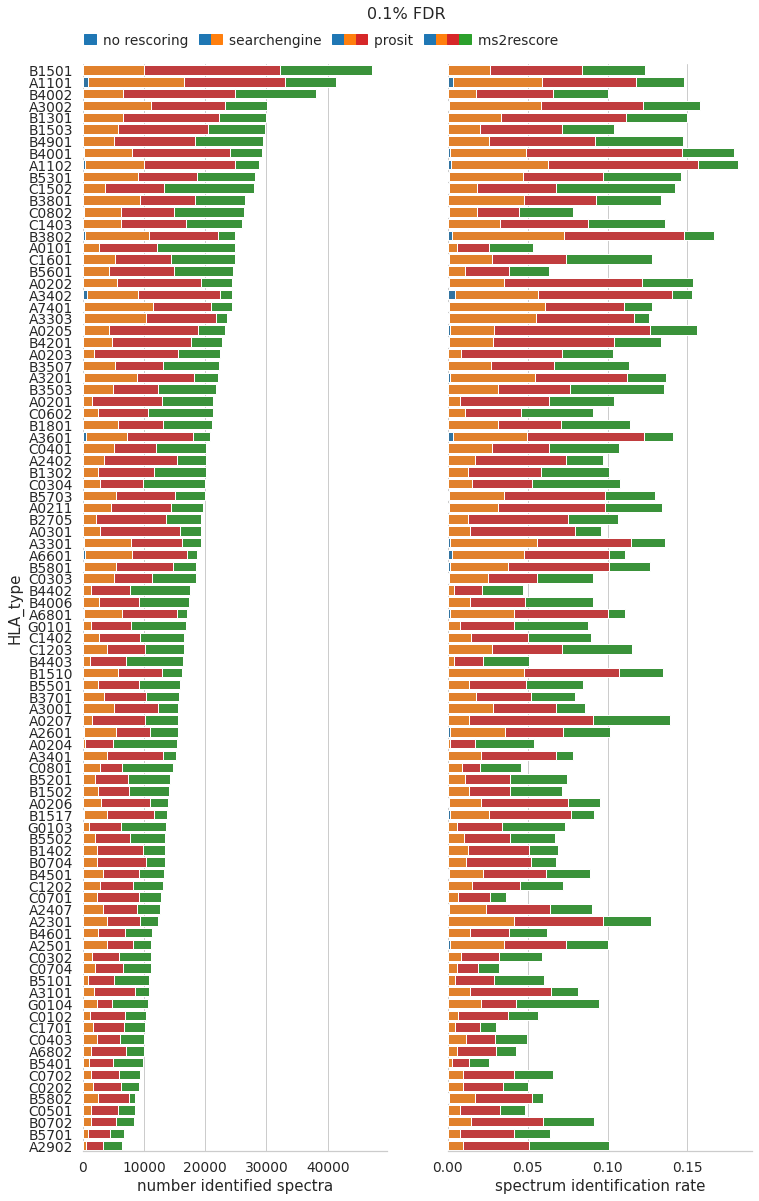

In [49]:
sns.set_context("notebook", font_scale=1.25)

fig = plt.Figure(figsize=(12,20))

ax1 = fig.add_subplot(121)

sns.barplot(x="psm count ms2rescore", y="HLA_type", label="ms2rescore", data=hla_count_df, color="#2ca02c", ax=ax1)
sns.barplot(x="psm count prosit", y="HLA_type", label="prosit", data=hla_count_df, color="#d62728", ax=ax1)
sns.barplot(x="psm count searchengine", y="HLA_type", label="searchengine", data=hla_count_df, color="#ff7f0e", ax=ax1)
sns.barplot(x="psm count no rescoring", y="HLA_type", label="no rescoring", data=hla_count_df, color="#1f77b4", ax=ax1)

ax1.set_xlabel("number identified spectra")

handles, labels = ax1.get_legend_handles_labels()

NOR = Patch(facecolor="#1f77b4", edgecolor="#1f77b4")
SE = Patch(facecolor="#ff7f0e", edgecolor="#ff7f0e")
PR = Patch(facecolor="#d62728", edgecolor="#d62728")
MS = Patch(facecolor="#2ca02c", edgecolor="#2ca02c")

ax1.legend(
    [NOR, NOR, SE,NOR,SE,PR,NOR,SE,PR,MS],
    ["no rescoring    ","","searchengine    ","", "", "prosit    ", "", "", "", "ms2rescore    "],
    frameon=False, 
    ncol=10,
    bbox_to_anchor=(1.66,1.04),
    handletextpad=0.5, 
    handlelength=0.85, 
    columnspacing=-0.5
)
sns.despine(left=True, right=True, top=True, ax=ax1)

ax2 = fig.add_subplot(122)

hla_id_rate = hla_count_df.copy()
hla_id_rate.iloc[:,1:] = hla_id_rate.iloc[:,1:].div(pd.Series(hla_spectra_count).reindex(hla_id_rate["HLA_type"]).values, axis=0)

sns.barplot(x="psm count ms2rescore", y="HLA_type", label="ms2rescore", data=hla_id_rate, color="#2ca02c", ax=ax2)
sns.barplot(x="psm count prosit", y="HLA_type", label="prosit", data=hla_id_rate, color="#d62728", ax=ax2)
sns.barplot(x="psm count searchengine", y="HLA_type", label="searchengine", data=hla_id_rate, color="#ff7f0e", ax=ax2)
sns.barplot(x="psm count no rescoring", y="HLA_type", label="no rescoring", data=hla_id_rate, color="#1f77b4", ax=ax2)

ax2.set_xlabel("spectrum identification rate")
ax2.set_ylabel("")
ax2.set(yticklabels=[])
sns.despine(left=True, right=True, top=True, ax=ax2)
fig.suptitle('0.1% FDR', fontsize=16, y=0.92)
fig.savefig("data/Figures/FigureS4.svg")
fig